Author: WenJun Cen<br>
Date: 12/29/2019<br>
File: Bank Marketing - Kaggle<br>

# Data Description

#### Input variables:
   ### bank client data:
   1 - age (numeric)<br>
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") <br>
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)<br>
   4 - education (categorical: "unknown","secondary","primary","tertiary")<br>
   5 - default: has credit in default? (binary: "yes","no")<br>
   6 - balance: average yearly balance, in euros (numeric) <br>
   7 - housing: has housing loan? (binary: "yes","no")<br>
   8 - loan: has personal loan? (binary: "yes","no")
   ### Related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")<br> 
  10 - day: last contact day of the month (numeric)<br>
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")<br>
  12 - duration: last contact duration, in seconds (numeric)
  ### Other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)<br>
  15 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  ### Output variable (desired target):<br>
  17 - y: has the client subscribed a term deposit? (binary: "yes","no")

# Reading Data & Manipulation

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
%matplotlib inline

bank = pd.read_csv('bank-full.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Data types of the variables
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [4]:
# Change binary variables to 1 and 0

binary_var = ['default', 'housing', 'loan', 'y']

for i in binary_var:
    bank[i].replace('yes', 1, inplace=True)
    bank[i].replace('no', 0, inplace=True)

bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [5]:
# Change data types

num_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

cat_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

for c in num_cols:
    bank[c] = bank[c].astype('int')
        
for i in cat_cols:
    bank[i] = bank[i].astype('category')
    
bank.dtypes

age             int32
job          category
marital      category
education    category
default         int64
balance         int32
housing         int64
loan            int64
contact      category
day             int32
month        category
duration        int32
campaign        int32
pdays           int32
previous        int32
poutcome     category
y               int32
dtype: object

In [6]:
# Exclude indexes
# pd.index.difference can exclude columns, therefore omit certain target columns in describe
bank[bank.columns.difference(['day', 'y'])].describe()

,age,balance,campaign,default,duration,housing,loan,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,2.763841,0.018027,258.163080,0.555838,0.160226,40.197828,0.580323
std,10.618762,3044.765829,3.098021,0.133049,257.527812,0.496878,0.366820,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,33.000000,72.000000,1.000000,0.000000,103.000000,0.000000,0.000000,-1.000000,0.000000
50%,39.000000,448.000000,2.000000,0.000000,180.000000,1.000000,0.000000,-1.000000,0.000000
75%,48.000000,1428.000000,3.000000,0.000000,319.000000,1.000000,0.000000,-1.000000,0.000000
max,95.000000,102127.000000,63.000000,1.000000,4918.000000,1.000000,1.000000,871.000000,275.000000


## Data Visualization

Text(0.5, 0, '\n Types of Job')

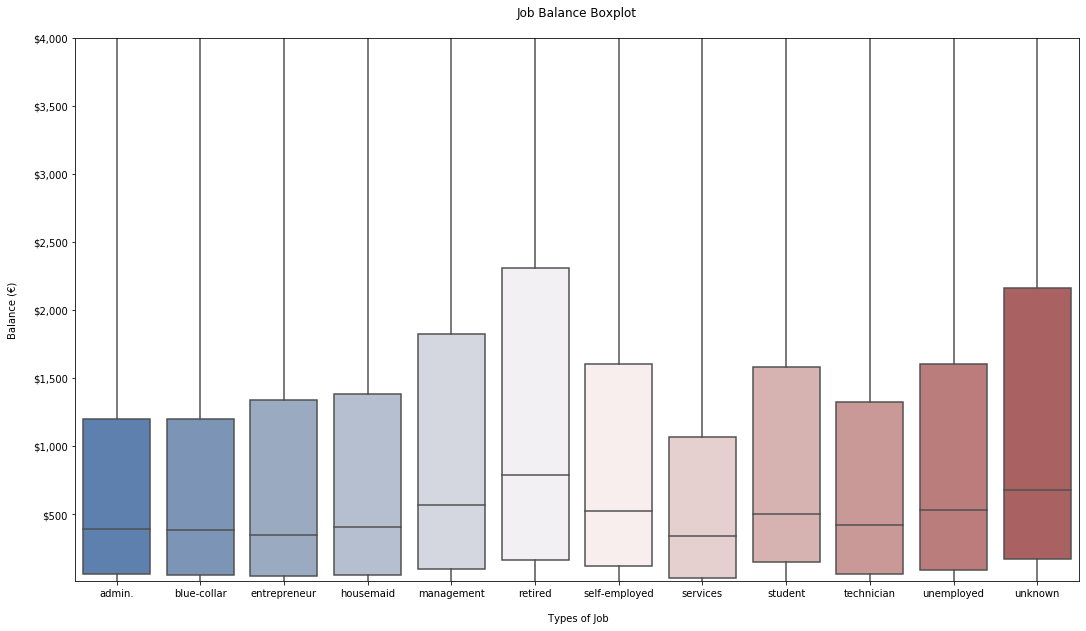

In [7]:
# Compare balance distribution between different job types

fig, ax = plt.subplots(figsize=(18, 10))

sns.boxplot(x='job', y='balance', data=bank,
            whis="range", palette="vlag")

ax.set(ylim=(10, 4000))
ax.set_title('Job Balance Boxplot\n')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

plt.ylabel(ylabel=('Balance (€)\n'))
plt.xlabel(xlabel=('\n Types of Job'))

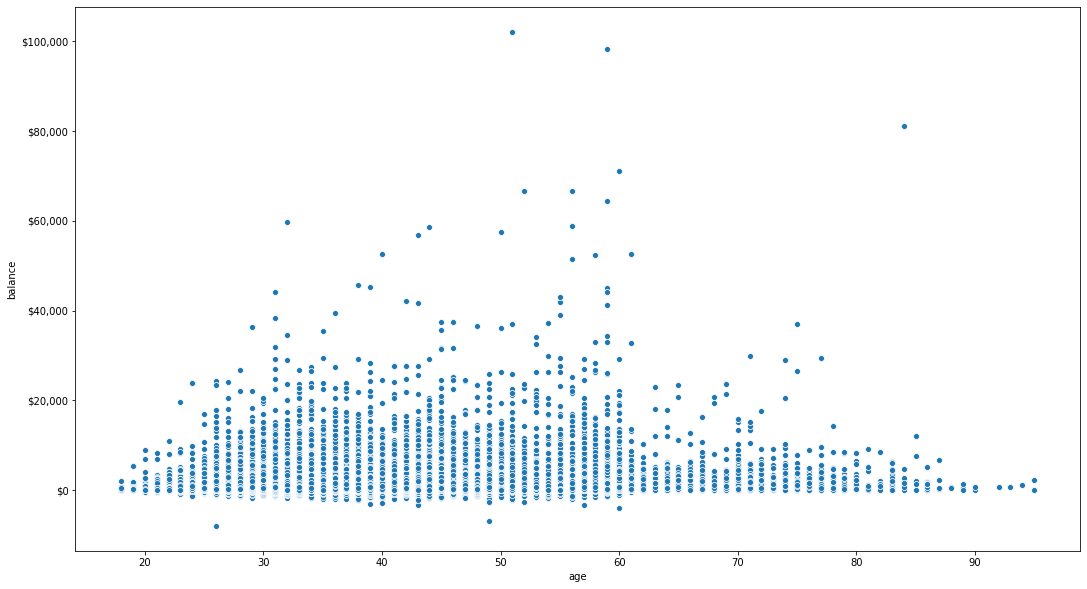

In [8]:
# Scatterplot to see if there is correlation between age and balance

fig, ax = plt.subplots(figsize=(18, 10))

sns.scatterplot(x='age', y='balance', data=bank)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

Text(0.5, 0, '\nBalance')

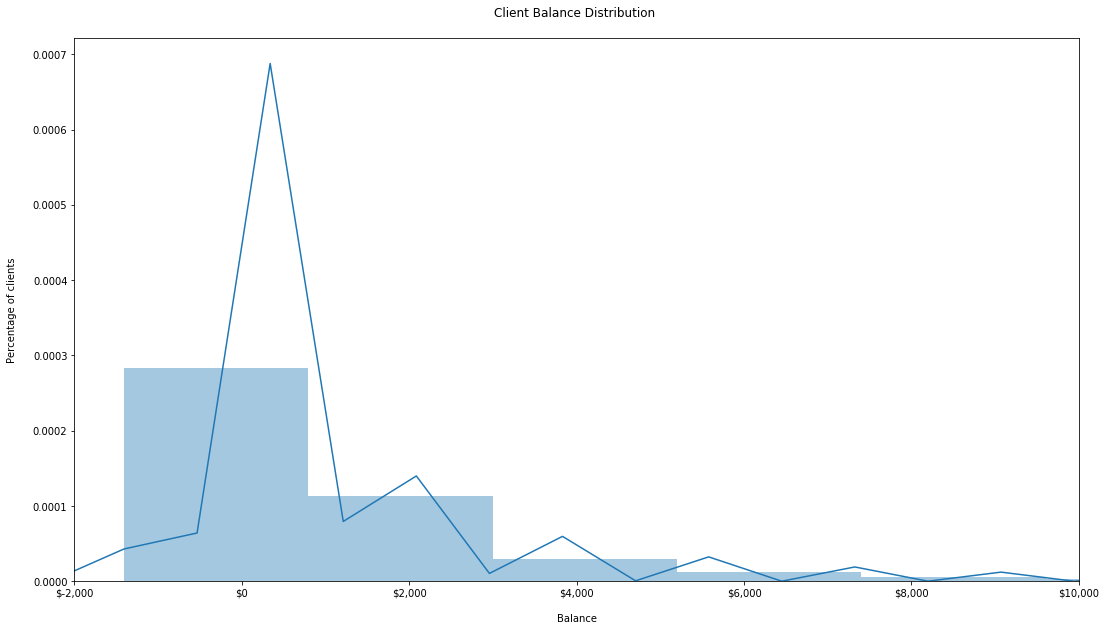

In [9]:
fig, ax = plt.subplots(figsize=(18, 10))

sns.distplot(bank['balance'])

ax.set_xlim(-2000,10000)
ax.set_title('Client Balance Distribution \n')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

plt.ylabel(ylabel=('Percentage of clients\n'))
plt.xlabel(xlabel=('\nBalance'))

## Exploratory Data Analysis

In [10]:
# Check for null values in each column

bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
# Binning age groups into column called age_cat

bins = [18, 25, 50, 75, 100]
labels = ['18-25', '25-50', '50-75', '75-100']

bank['age_cat'] = pd.cut(bank.age, bins=bins, labels=labels, include_lowest=True)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_cat
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0,50-75
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0,25-50
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0,25-50
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0,25-50
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0,25-50


In [12]:
# Getting the average client balance by grouping age groups

bank.groupby('age_cat').mean()['balance']

age_cat
18-25      897.970060
25-50     1247.541768
50-75     1833.098065
75-100    2732.620690
Name: balance, dtype: float64

In [13]:
# Getting the proportion of age groups
# Need scaler to ensure normalization

bank.groupby('age_cat').count()['balance']

age_cat
18-25      1336
25-50     34620
50-75      8994
75-100      261
Name: balance, dtype: int64

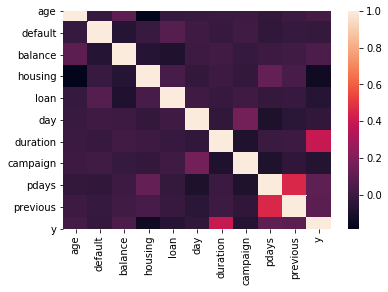

In [14]:
sns.heatmap(bank.corr())

## Data Preparation

In [15]:
# Hot encoding

education_bin = pd.get_dummies(bank['education'], prefix='edu')


bank_model = pd.concat([bank, education_bin], axis='columns')
bank_model = bank_model[bank_model.columns.difference(['job', 'marital', 'education', 'contact',
                                          'month', 'pdays','poutcome', 'age_cat'])]
bank_model

,age,balance,campaign,day,default,duration,edu_primary,edu_secondary,edu_tertiary,edu_unknown,housing,loan,previous,y
0,58,2143,1,5,0,261,0,0,1,0,1,0,0,0
1,44,29,1,5,0,151,0,1,0,0,1,0,0,0
2,33,2,1,5,0,76,0,1,0,0,1,1,0,0
3,47,1506,1,5,0,92,0,0,0,1,1,0,0,0
4,33,1,1,5,0,198,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,3,17,0,977,0,0,1,0,0,0,0,1
45207,71,1729,2,17,0,456,1,0,0,0,0,0,0,1
45208,72,5715,5,17,0,1127,0,1,0,0,0,0,3,1
45209,57,668,4,17,0,508,0,1,0,0,0,0,0,0


In [16]:
# Split into train and test data

from sklearn.model_selection import train_test_split

x = bank_model[['age', 'balance', 'campaign', 'day', 'default', 'duration', 
               'edu_primary', 'edu_secondary', 'edu_tertiary', 'edu_unknown',
               'housing', 'loan', 'previous']]

y = bank_model['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

## Models

### Logistic Regression Model

In [18]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()

logit_model = logit.fit(x_train, y_train)

logit_pred = logit_model.predict(x_test)
y_actual = y_test

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


print(f1_score(y_actual, logit_pred))
print(accuracy_score(y_actual, logit_pred))
confusion_matrix(y_actual, logit_pred)

0.28409090909090906
0.8885325666261197


array([[7835,  151],
       [ 857,  200]], dtype=int64)

### Support Vector Machine

In [26]:
from sklearn import svm

s_vm = svm.SVC()

s_vm_model = s_vm.fit(x_train, y_train)

s_vm_pred = s_vm_model.predict(x_test)

In [27]:
print(f1_score(y_actual, s_vm_pred ))
print(accuracy_score(y_actual, s_vm_pred ))
confusion_matrix(y_actual, s_vm_pred )

0.0
0.8831140108371116


array([[7986,    0],
       [1057,    0]], dtype=int64)

### Decision Tree

In [20]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

clf_model = clf.fit(x_train, y_train)
clf_pred = clf_model.predict(x_test)

In [21]:
print(f1_score(y_actual, clf_pred))
print(accuracy_score(y_actual, clf_pred))
confusion_matrix(y_actual, clf_pred)

0.3707865168539326
0.8513767555014928


array([[7303,  683],
       [ 661,  396]], dtype=int64)

### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10)

rfc_model = rfc.fit(x_train, y_train)
rfc_pred = rfc_model.predict(x_test)

In [23]:
print(f1_score(y_actual, rfc_pred))
print(accuracy_score(y_actual, rfc_pred))
confusion_matrix(y_actual, rfc_pred)

0.36739811912225706
0.8884219838549154


array([[7741,  245],
       [ 764,  293]], dtype=int64)

### Naive Bayes Classification

In [24]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()

GNB_model = GNB.fit(x_train, y_train)
GNB_pred = GNB_model.predict(x_test)

In [25]:
print(f1_score(y_actual, GNB_pred))
print(accuracy_score(y_actual, GNB_pred))
confusion_matrix(y_actual, GNB_pred)

0.4087048832271762
0.8768107928784695


array([[7544,  442],
       [ 672,  385]], dtype=int64)